In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier
from mpl_toolkits.mplot3d import Axes3D
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Using TensorFlow backend.
/Users/tailtq/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### Steps:
1. Check missing values
2. Data exploitation
3. Check outliers
4. Feature scaling
    + Elevation
    + Aspect
    + Slope
    + Horizontal_Distance_To_Hydrology
    + Vertical_Distance_To_Hydrology
    + Horizontal_Distance_To_Roadways
    + Hillshade_9am
    + Hillshade_Noon
    + Hillshade_3pm
    + Horizontal_Distance_To_Fire_Points
5. Use multiple models (model selection)
    + Perceptron
    + Random forest
    + Decision tree
    + OvR regression

#### 1. Check missing values

In [3]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [4]:
df.isnull()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 2. Data exploitation

In [5]:
areas = df.copy()

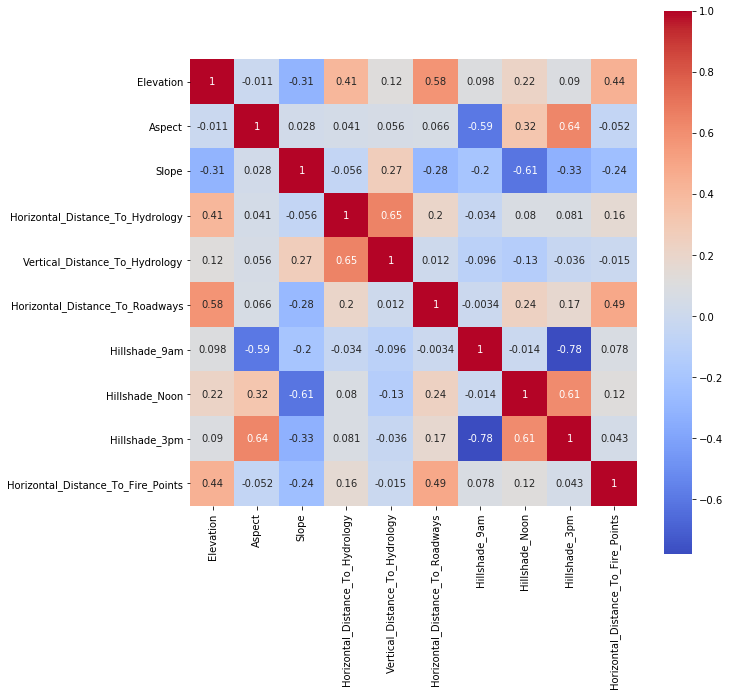

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(areas[[
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
]].corr(), annot=True, square=True, ax=ax, cmap='coolwarm')

In [7]:
areas['Distance_To_Hydrology'] = (areas['Horizontal_Distance_To_Hydrology'] ** 2 + areas['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

# from 0.66 --> 0.61
areas['Hillshade_9am_Level'] = np.ceil(areas['Hillshade_9am'] / 50)
areas['Hillshade_Noon_Level'] = np.ceil(areas['Hillshade_Noon'] / 50)
areas['Hillshade_3pm_Level'] = np.ceil(areas['Hillshade_3pm'] / 50)

areas[areas['Hillshade_9am_Level'] == 6] = 5
areas[areas['Hillshade_Noon_Level'] == 6] = 5
areas[areas['Hillshade_3pm_Level'] == 6] = 5
areas['Hillshade_Level'] = np.round((areas['Hillshade_9am_Level'] + areas['Hillshade_Noon_Level'] + areas['Hillshade_3pm_Level']) / 3)

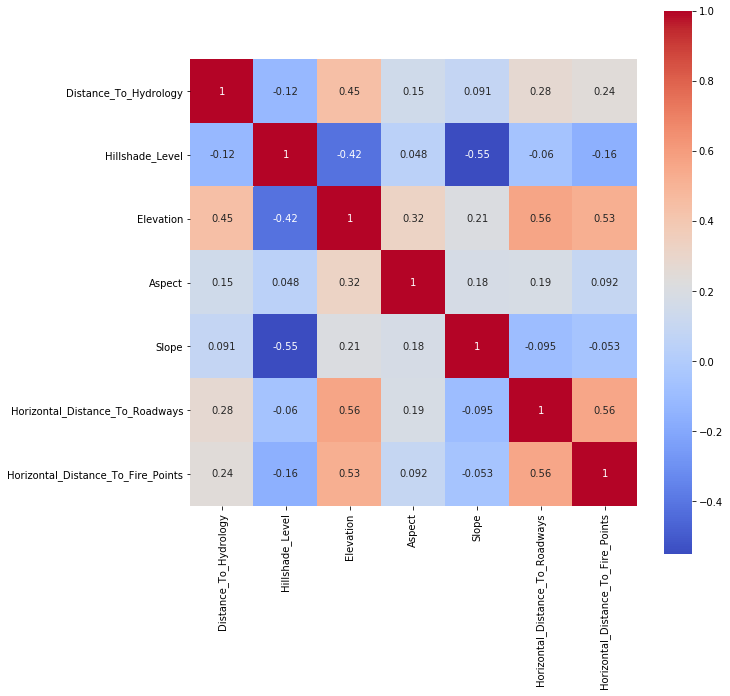

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(areas[[
    'Distance_To_Hydrology',
    'Hillshade_Level',
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Roadways',
    'Horizontal_Distance_To_Fire_Points',
]].corr(), annot=True, square=True, ax=ax, cmap='coolwarm')

/Users/tailtq/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


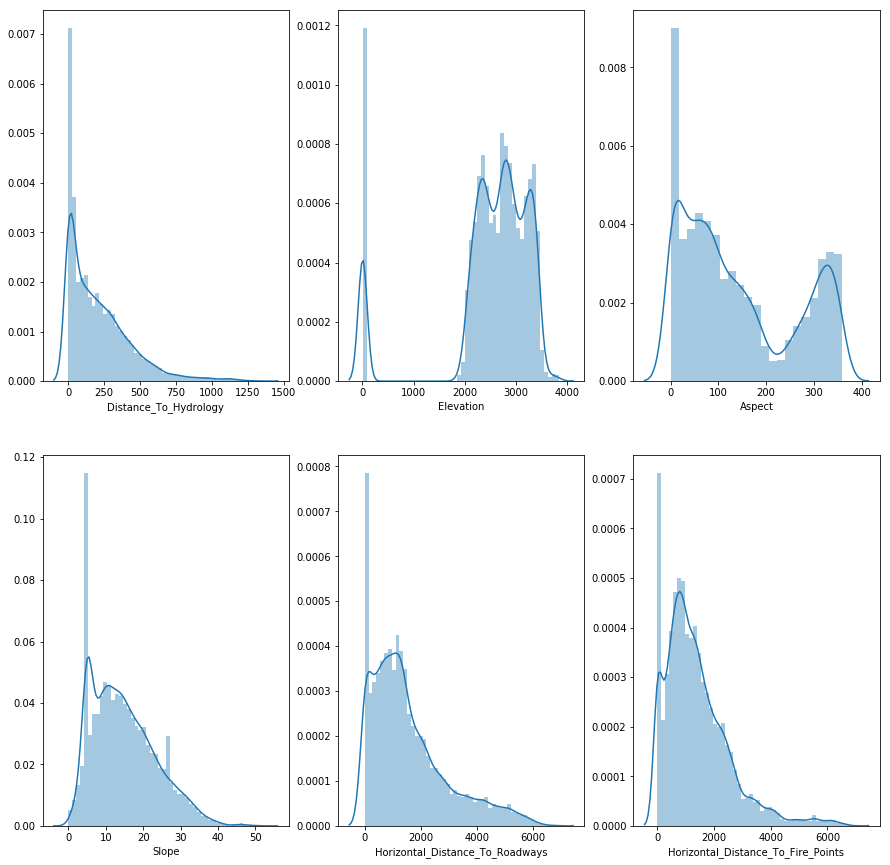

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15, 15))

sns.distplot(areas['Distance_To_Hydrology'], ax=ax[0][0])
sns.distplot(areas['Elevation'], ax=ax[0][1])
sns.distplot(areas['Aspect'], ax=ax[0][2])
sns.distplot(areas['Slope'], ax=ax[1][0])
sns.distplot(areas['Horizontal_Distance_To_Roadways'], ax=ax[1][1])
sns.distplot(areas['Horizontal_Distance_To_Fire_Points'], ax=ax[1][2])

plt.show()

In [10]:
# q = areas['Horizontal_Distance_To_Fire_Points'].quantile(0.99)
# areas = areas[areas['Horizontal_Distance_To_Fire_Points'] < q]

# q = areas['Horizontal_Distance_To_Roadways'].quantile(0.99)
# areas = areas[areas['Horizontal_Distance_To_Roadways'] < q]

# q = areas['Distance_To_Hydrology'].quantile(0.99)
# areas = areas[areas['Distance_To_Hydrology'] < q]

#### Feature scaling

In [11]:
features_scaling = ['Elevation', 'Aspect', 'Slope', 'Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']

for feature in features_scaling:
    areas[feature] = areas[feature] / areas[feature].max()

In [12]:
dropped_columns = [
    'Id',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Hillshade_9am_Level',
    'Hillshade_Noon_Level',
    'Hillshade_3pm_Level',
    'Cover_Type'
]
X = areas.drop(dropped_columns, axis=1)
y = areas['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=3)

X.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Distance_To_Hydrology,Hillshade_Level
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.652542,0.395746,0.283427,0.229460,0.199904,0.684458,0.489749,0.839484,0.725463,0.477381,...,0.494841,0.458862,0.464153,0.458333,0.459854,0.504034,0.498347,0.486243,0.158302,4.209656
std,0.231075,0.326051,0.162241,0.199287,0.164077,1.430664,1.442470,1.401987,1.424777,1.442329,...,1.442497,1.441920,1.442061,1.441905,1.441948,1.442501,1.442506,1.442441,0.161220,0.485615
min,0.001299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.599636,0.119444,0.153846,0.083745,0.086801,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023082,4.000000
50%,0.705378,0.294444,0.250000,0.178665,0.165022,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116065,4.000000
75%,0.799169,0.725000,0.384615,0.317562,0.276133,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238801,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000


#### Models selection

In [13]:
model1 = RandomForestClassifier(criterion='entropy', random_state=0)
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.85

In [14]:
model2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.85

In [15]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
model3.score(X_test, y_test)

0.4

In [16]:
def plot_learning_curve(estimator, X, y):
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, 
                                                            y,
                                                            # Number of folds in cross-validation
                                                            # Evaluation metric
                                                            scoring='accuracy',
                                                            cv=10,
                                                            # Use all computer cores
                                                            n_jobs=-1, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 50))
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color='#111111',  label='Training score')
    plt.plot(train_sizes, test_mean, color='#111111', label='Cross-validation score')

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

    # Create plot
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy Score'), plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [17]:
# plot_learning_curve(OneVsRestClassifier(LogisticRegression()), X_train, y_train)

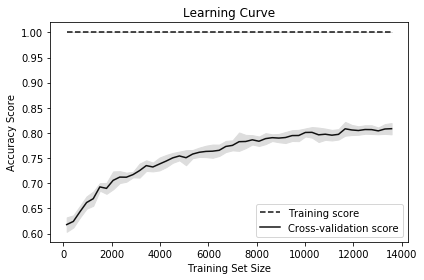

In [18]:
plot_learning_curve(DecisionTreeClassifier(criterion='entropy', random_state=0), X_train, y_train)

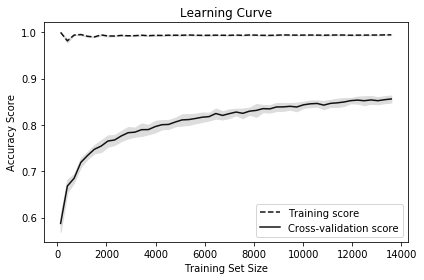

In [19]:
plot_learning_curve(RandomForestClassifier(criterion='entropy', random_state=0), X_train, y_train)

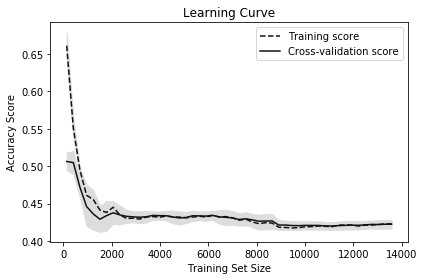

In [20]:
plot_learning_curve(GaussianNB(), X_train, y_train)

In [21]:
X.columns.values

array(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4',
       'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Distance_To_Hydrology', 'Hillshade_Level'], dtype=object)

## Test set

In [22]:
areas_test = df_test.copy()

In [23]:
areas_test['Distance_To_Hydrology'] = (areas_test['Horizontal_Distance_To_Hydrology'] ** 2 + areas_test['Vertical_Distance_To_Hydrology'] ** 2) ** 0.5

# from 0.66 --> 0.61
areas_test['Hillshade_9am_Level'] = np.ceil(areas_test['Hillshade_9am'] / 50)
areas_test['Hillshade_Noon_Level'] = np.ceil(areas_test['Hillshade_Noon'] / 50)
areas_test['Hillshade_3pm_Level'] = np.ceil(areas_test['Hillshade_3pm'] / 50)

areas_test[areas_test['Hillshade_9am_Level'] == 6] = 5
areas_test[areas_test['Hillshade_Noon_Level'] == 6] = 5
areas_test[areas_test['Hillshade_3pm_Level'] == 6] = 5
areas_test['Hillshade_Level'] = np.round((areas_test['Hillshade_9am_Level'] + areas_test['Hillshade_Noon_Level'] + areas_test['Hillshade_3pm_Level']) / 3)

for feature in features_scaling:
    areas_test[feature] = areas_test[feature] / areas_test[feature].max()

In [24]:
dropped_columns.remove('Cover_Type')
X = areas_test.drop(dropped_columns, axis=1)

In [25]:
predictions = model1.predict(X)

In [26]:
result = df_test[['Id']]
result['Cover_Type'] = predictions

/Users/tailtq/opt/anaconda3/envs/python-cvcourse/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
result.to_csv(path_or_buf='result.csv',index=False)